學習SVM的課程 https://www.youtube.com/watch?v=nzetRUdLHp4&index=10&list=PLGmd9-PCMLhZu9ll-3gM__pqL5khffpFz




以下我還是會拿iris的dataset做SVM的training，並且使用二維的方式做視覺畫的處理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [2]:
%matplotlib inline

In [3]:
iris_dataset = datasets.load_iris()
x = pd.DataFrame(iris_dataset.data[:,:2])
y = pd.DataFrame(iris_dataset.target)
y = y.rename(index=str, columns={0:"target"})
x = x.rename(index=str, columns={0:"花萼長度", 1:"花萼寬度"})
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data

,花萼長度,花萼寬度,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [4]:
x = iris_data.iloc[:,0:2].values
y = iris_data.iloc[:,2].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [6]:
stand_scaler = StandardScaler()
stand_scaler.fit(x_train)
x_train_std = stand_scaler.transform(x_train)
x_test_std = stand_scaler.transform(x_test)

# setting SVM model

In [7]:
from sklearn.svm import SVC

In [8]:
svm = SVC(kernel='linear', probability=True)

In [9]:
svm.fit(x_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
svm_pred = svm.predict(x_test_std)
print(svm_pred)
train_scroe = svm.score(x_train_std, y_train)
test_scroe = svm.score(x_test_std, y_test)
print(train_scroe," , ", test_scroe)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]
1.0  ,  1.0


In [11]:
svm_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [12]:
error = 0
for i, v in enumerate(svm.predict(x_test_std)):
    if v!= pd.DataFrame(y_test).values[i]:
        error+=1
print(error)

0


In [13]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.005):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    svm_pred = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    svm_pred = svm_pred.reshape(xx.shape)
    plt.contourf(xx, yy, svm_pred, alpha=0.4, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    #對應上面的cmap去進行顏色的畫圖, 0=red, 1=blue
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
        plt.scatter(X[:, 0], X_test[:, 1])
                    

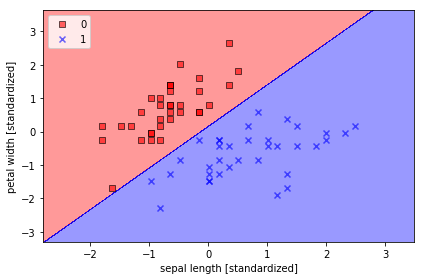

In [14]:
plot_decision_regions(x_train_std, y_train, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()